In [71]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [72]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [73]:
df=pd.read_csv("winedataset.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
df.shape

(178, 14)

In [75]:
#Checking data dimension, Dataset has 178 rows and 14 columns

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [77]:
# Checking the datatypes of all the columns
# Data set has 64 float & 3 integer data type with no null values

In [78]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [79]:
#There is no missing values
#No much differences observed between mean and median, so outliers are not there
#The values of Mean and median is close

In [80]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [81]:
# No null values

In [82]:
#Graphical representation to check if there is any missing values

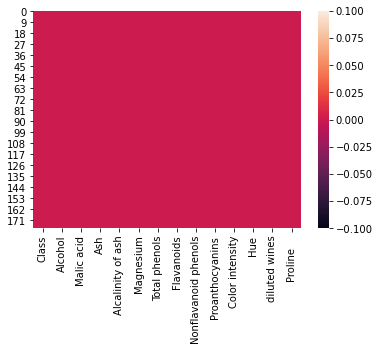

In [83]:
sns.heatmap(df.isnull())

In [84]:
#Dataset has no null values

In [85]:
dfcor=df.corr()
dfcor

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


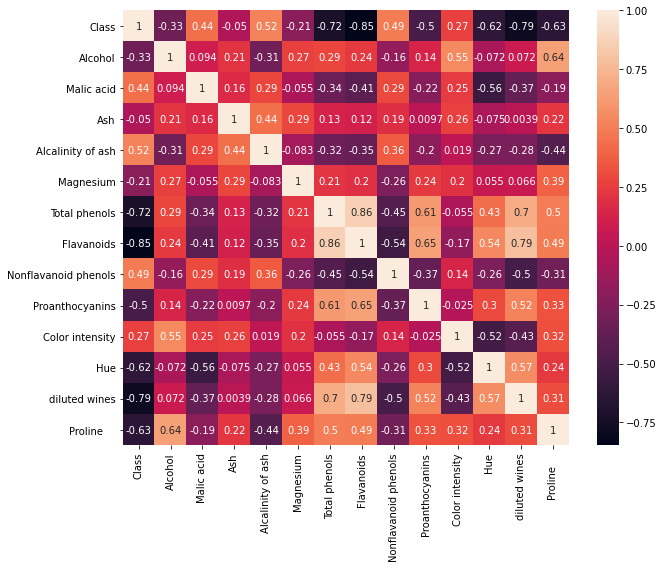

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True)

In [87]:
df.Class.unique()

array([1, 2, 3], dtype=int64)

In [88]:
# Outcome , Y -dependent variable

In [89]:
#Bivariate analysis

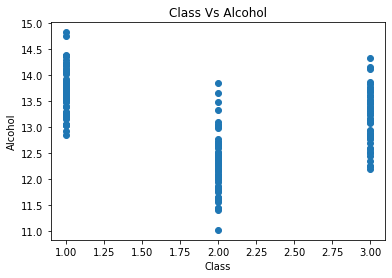

In [90]:
plt.scatter(df['Class'],df['Alcohol'])
plt.title('Class Vs Alcohol')
plt.xlabel('Class')
plt.ylabel('Alcohol')
plt.show()

In [91]:
# Class 1 lies roughly in the range of alcohol percentage (12.8 to 15)
# Class 2 lies roughly in the range of alcohol percentage (11.5 to 14)
# Class 2 lies roughly in the range of alcohol percentage (12.3 to 14.5)


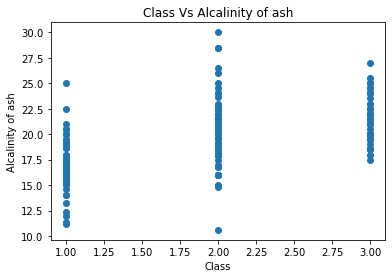

In [92]:
plt.scatter(df['Class'],df['Alcalinity of ash'])
plt.title('Class Vs Alcalinity of ash')
plt.xlabel('Class')
plt.ylabel('Alcalinity of ash')
plt.show()

In [93]:
# Class 1 lies majorly in the range of Alcalinity of ash percentage (11 to 21)
# Class 2 lies majorly in the range of Alcalinity of ash percentage (15 to 26)
# Class 2 lies majorly in the range of Alcalinity of ash percentage (18 to 26)

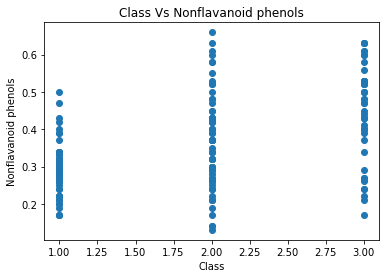

In [94]:
plt.scatter(df['Class'],df['Nonflavanoid phenols'])
plt.title('Class Vs Nonflavanoid phenols')
plt.xlabel('Class')
plt.ylabel('Nonflavanoid phenols')
plt.show()

In [95]:
#Phenolics are chemical compounds that affect the taste, feel and color of wine. 
# Class 1 lies majorly in the range of Nonflavanoid phenols percentage (0.1 to 0.48)
# Class 2 lies majorly in the range of Nonflavanoid phenols percentage (0 to 0.8)
# Class 2 lies majorly in the range of Nonflavanoid phenols percentage (0.1 to 0.7)

In [96]:
#Plotting outliers
# Univariate analysis

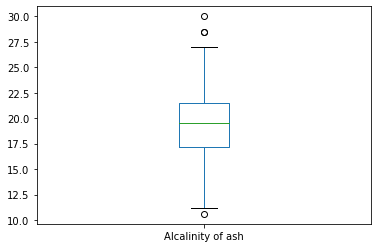

In [97]:
df['Alcalinity of ash'].plot.box()

In [98]:
# not much outlier present

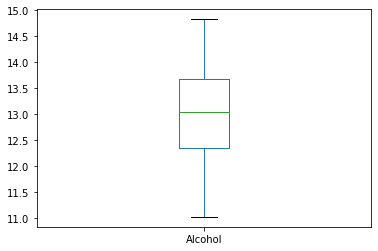

In [99]:
df['Alcohol'].plot.box()

In [100]:
# no outlier

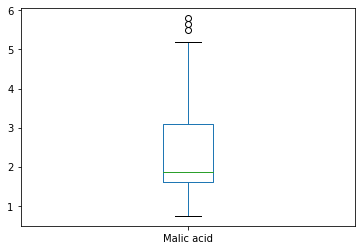

In [101]:
df['Malic acid'].plot.box()

In [102]:
# some outliers present in malic acid

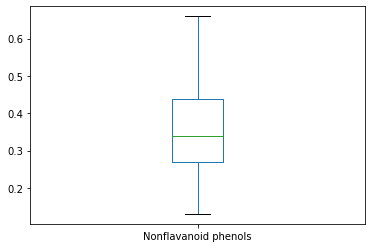

In [103]:
df['Nonflavanoid phenols'].plot.box()

In [104]:
# no outliers present

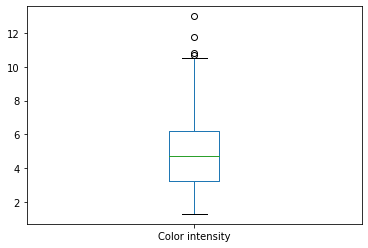

In [105]:
df['Color intensity'].plot.box()

In [106]:
# some outliers present

In [107]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.21394365, 1.51861254, 0.5622498 , ..., 0.36217728, 1.84791957,
        1.01300893],
       [1.21394365, 0.24628963, 0.49941338, ..., 0.40605066, 1.1134493 ,
        0.96524152],
       [1.21394365, 0.19687903, 0.02123125, ..., 0.31830389, 0.78858745,
        1.39514818],
       ...,
       [1.37386437, 0.33275817, 1.74474449, ..., 1.61212515, 1.48544548,
        0.28057537],
       [1.37386437, 0.20923168, 0.22769377, ..., 1.56825176, 1.40069891,
        0.29649784],
       [1.37386437, 1.39508604, 1.58316512, ..., 1.52437837, 1.42894777,
        0.59516041]])

In [108]:
threshold =3
print(np.where(z > 3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))


In [109]:
z[25][3]

3.1197718608780005

In [110]:
z[73][4]

3.1545107139410433

In [111]:
df_new=df[(z<3).all(axis =1)]
df_new

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [112]:
df_new.shape

(168, 14)

In [113]:
df.shape

(178, 14)

In [114]:
# 10 rows are outliers

In [115]:
df_new.skew()

Class                   0.117053
Alcohol                -0.028038
Malic acid              0.966253
Ash                    -0.250438
Alcalinity of ash       0.104774
Magnesium               0.566522
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols    0.481810
Proanthocyanins         0.360217
Color intensity         0.732580
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.744773
dtype: float64

Class                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic acid              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Alcalinity of ash       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Magnesium               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total phenols           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid phenols       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanthocyanins            AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color intensity            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
diluted wines              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Proline                    AxesSubplot

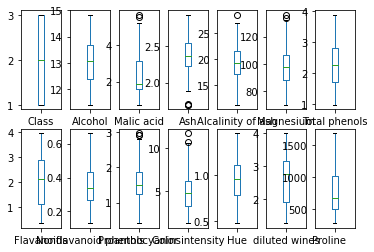

In [116]:
df_new.plot(kind='box',subplots=True,layout=(2,7))

In [117]:
#Skewness is in acceptable range (+/0.5)
#Malic acid,Magnesium,Color intensity,Proline are skewed

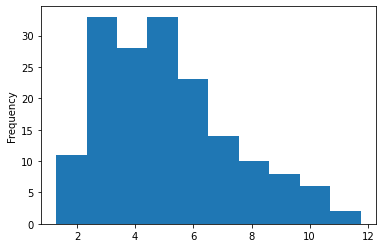

In [118]:
df_new['Color intensity'].plot.hist()

In [119]:
from scipy.stats import boxcox
df_new['Color intensity']=boxcox(df_new['Color intensity'],0)

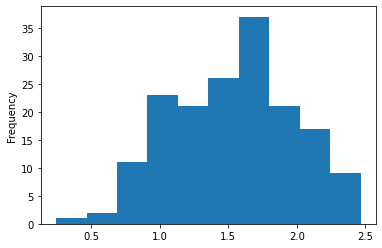

In [120]:
df_new['Color intensity'].plot.hist()

In [121]:
df_new.keys()

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [122]:
y=df_new.iloc[:,0]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [123]:
x=df_new.iloc[:,1:]
x.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,1.729884,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,1.477049,1.05,3.40,1050


In [124]:
x.shape

(168, 13)

In [125]:
y.shape

(168,)

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [127]:
x_train.shape

(112, 13)

In [128]:
y_train.shape

(112,)

In [63]:
x_test.shape

(56, 13)

In [64]:
y_test.shape

(56,)

In [130]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.875
[[19  0  1]
 [ 1 18  2]
 [ 2  1 12]]
              precision    recall  f1-score   support

           1       0.86      0.95      0.90        20
           2       0.95      0.86      0.90        21
           3       0.80      0.80      0.80        15

    accuracy                           0.88        56
   macro avg       0.87      0.87      0.87        56
weighted avg       0.88      0.88      0.87        56



In [131]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7857142857142857
[[19  0  1]
 [ 1 19  1]
 [ 2  7  6]]
              precision    recall  f1-score   support

           1       0.86      0.95      0.90        20
           2       0.73      0.90      0.81        21
           3       0.75      0.40      0.52        15

    accuracy                           0.79        56
   macro avg       0.78      0.75      0.75        56
weighted avg       0.78      0.79      0.77        56



In [132]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))


In [134]:
svmkernel('poly')

0.75
[[19  1  0]
 [ 1 20  0]
 [ 3  9  3]]
              precision    recall  f1-score   support

           1       0.83      0.95      0.88        20
           2       0.67      0.95      0.78        21
           3       1.00      0.20      0.33        15

    accuracy                           0.75        56
   macro avg       0.83      0.70      0.67        56
weighted avg       0.81      0.75      0.70        56



In [135]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.875
[[19  1  0]
 [ 1 20  0]
 [ 0  5 10]]
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       0.77      0.95      0.85        21
           3       1.00      0.67      0.80        15

    accuracy                           0.88        56
   macro avg       0.91      0.86      0.87        56
weighted avg       0.90      0.88      0.87        56



In [143]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6785714285714286
[[19  1  0]
 [ 1 16  4]
 [ 5  7  3]]
              precision    recall  f1-score   support

           1       0.76      0.95      0.84        20
           2       0.67      0.76      0.71        21
           3       0.43      0.20      0.27        15

    accuracy                           0.68        56
   macro avg       0.62      0.64      0.61        56
weighted avg       0.64      0.68      0.64        56



In [147]:
#DecisionTreeClassifier() & MultinomialNB() are best performing model with almost same accuracy and cross validation score, 
#we can choose either of them as out best model


In [148]:
import joblib
joblib.dump(dtc,"Wine Project.pkl")

['Wine Project.pkl']

In [149]:
v=joblib.load("Wine Project.pkl")

In [150]:
v.predict(x_test)

array([3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       3, 2, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2], dtype=int64)

In [152]:
v.score(x_train,y_train)

1.0

In [153]:
v.fit(x_train,y_train)

DecisionTreeClassifier()

In [161]:
x_test.iloc[0]

Alcohol                  13.880000
Malic acid                5.040000
Ash                       2.230000
Alcalinity of ash        20.000000
Magnesium                80.000000
Total phenols             0.980000
Flavanoids                0.340000
Nonflavanoid phenols      0.400000
Proanthocyanins           0.680000
Color intensity           1.589235
Hue                       0.580000
diluted wines             1.330000
Proline                 415.000000
Name: 146, dtype: float64

In [175]:
v.predict(x_test.iloc[0:1,:])

array([3], dtype=int64)

In [180]:
x_test.iloc[0:1,:]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.4,0.68,1.589235,0.58,1.33,415
